In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_excel("C:/Users/vaishnavi/Desktop/DBDA\ML Practical/Assignments/classification/fruitdata.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fruit_label  59 non-null     int64  
 1   fruit_name   59 non-null     object 
 2   mass         59 non-null     int64  
 3   width        59 non-null     float64
 4   height       59 non-null     float64
 5   color_score  59 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 2.9+ KB


In [3]:
df[["fruit_label","mass","width","height","color_score"]].corr()

,fruit_label,mass,width,height,color_score
fruit_label,1.000000,0.032738,-0.298090,0.508766,-0.310521
mass,0.032738,1.000000,0.877687,0.609571,-0.079794
width,-0.298090,0.877687,1.000000,0.396848,-0.076576
height,0.508766,0.609571,0.396848,1.000000,-0.247047
color_score,-0.310521,-0.079794,-0.076576,-0.247047,1.000000


In [20]:
df["fruit_name"].value_counts()

fruit_name
apple       19
orange      19
lemon       16
mandarin     5
Name: count, dtype: int64

In [9]:
import seaborn as sns

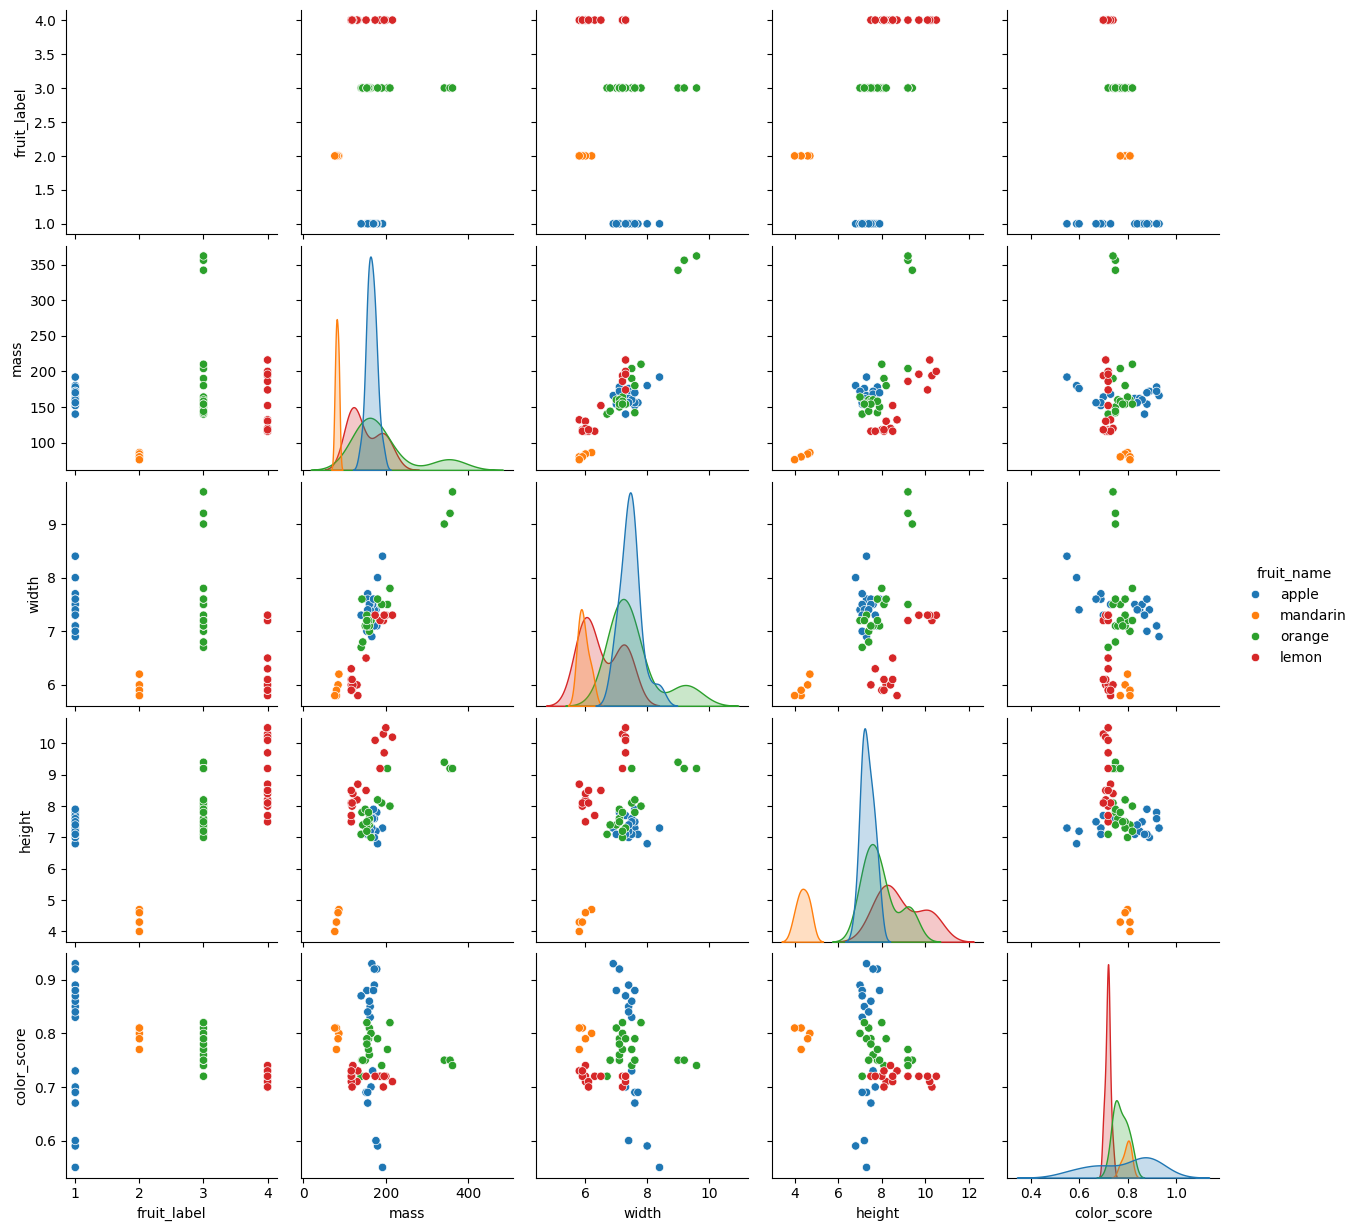

In [10]:
sns.pairplot(df,hue='fruit_name');

In [11]:
from scipy.stats import f_oneway

In [14]:
for i in df.columns[[0,2,3,4,5]]:
    grp = df.groupby("fruit_name")[i]
    print("for column", i , "P- value is",f_oneway(*grp.apply(list))[1])

for column fruit_label P- value is 0.0
for column mass P- value is 0.0001332723130391377
for column width P- value is 5.8392350995870675e-08
for column height P- value is 2.596659800055723e-16
for column color_score P- value is 0.04219795117007286


C:\Users\vaishnavi\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


In [22]:
X=df[["width","height","color_score"]].values
print(X.shape)
y= df["fruit_label"].values
y.shape

(59, 3)


(59,)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size = 0.2,
                                                 random_state = 100)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(47, 3) (12, 3) (47,) (12,)


In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train,y_train).score(X_test,y_test)

0.8333333333333334

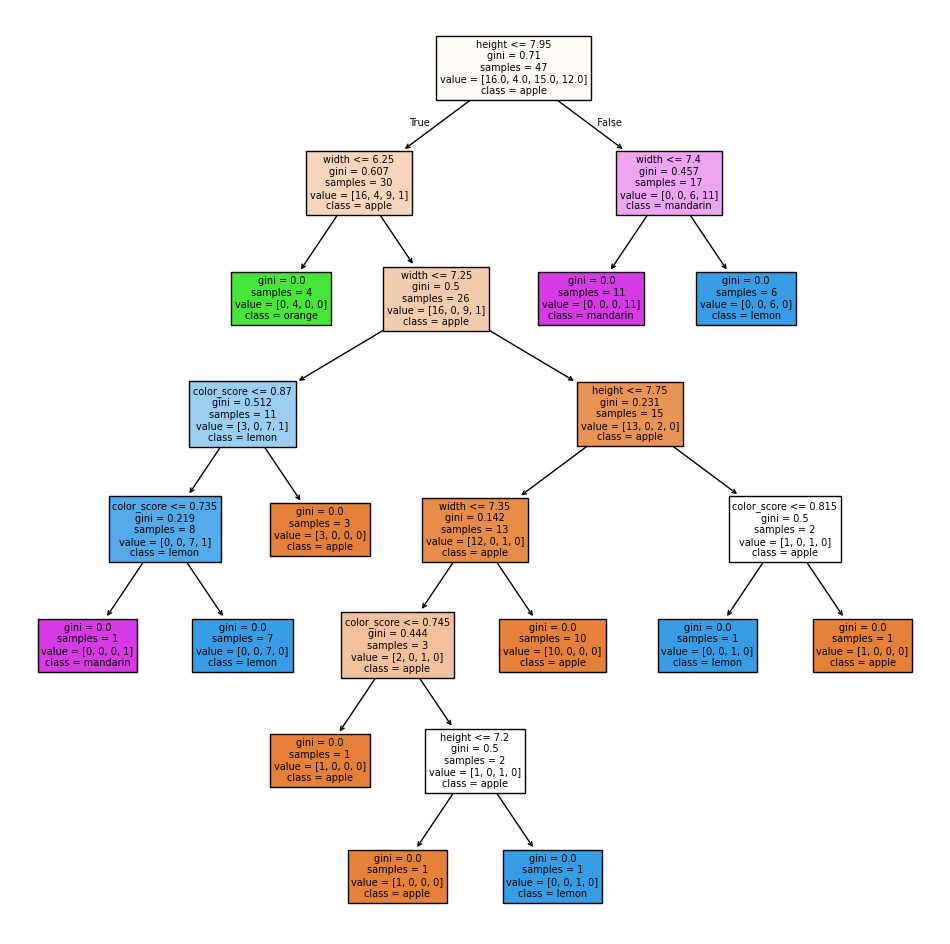

In [26]:
from sklearn import tree
plt.figure(figsize=(12,12))
fn =["width","height","color_score"]
cn =['apple','orange','lemon','mandarin']
tree.plot_tree(model,filled = True,feature_names = fn, class_names = cn);